# Intro to Machine learning

If you're viewing this in Github you can open the notebook in Google Colab to run in your browser.



Find more information, such as slides, etc in the GitHub repo.



Save a copy in your Google drive



Note about Google Colab








# Import Data

Data is what drives all machine learning models!

In [33]:
# Import iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

Always take a quick look at your data to make sure its what you're expecting!

In [ ]:
# Print out raw dataset
iris

In [35]:
#150 rows (samples) 4 columns (features: Height & Width of Pedals & Sepals)
print(iris.data.shape)

(150, 4)


In [36]:
# target (label) Shape
print(iris.target.shape)

(150,)


Reading in your own data

In [5]:
# Import data
# iris_df = pd.read_csv('../datasets/iris/iris.csv')

# Explore the dataset

Exploratory Data Analysis (EDA) is a common part of machine learning

We'll use:
- pandas
- matplotlib
- seaborn




In [37]:
#import Pandas
import pandas as pd


In [38]:
# Make a Dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [39]:
# returns first 5 rows(default)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Create a full Data frame

If our labels were already in a CSV we imported we wouldn't have to concat like this

In [40]:
import numpy as np

In [41]:
#create dataframe with Pandas & numpy
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [42]:
#display Dataframe


# # Print just the first 5 rows

## prints the last 10 rows
# df.tail(10)

# Change settings to display all of our rows.

df

# pd.options.display.max_rows = 200
# df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>

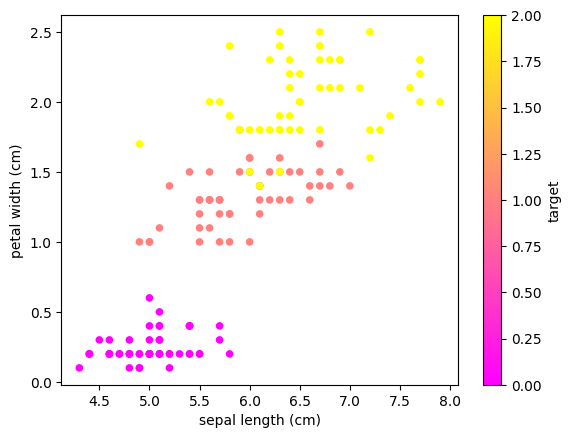

In [43]:
df.plot(kind='scatter', x = 'sepal length (cm)', y = 'petal width (cm)', c='target', cmap=('spring'))

In [44]:
# Pairplot
import seaborn as sns

Even without color you can maybe make some guesses on how to cluster

Imagine a unsupervised model

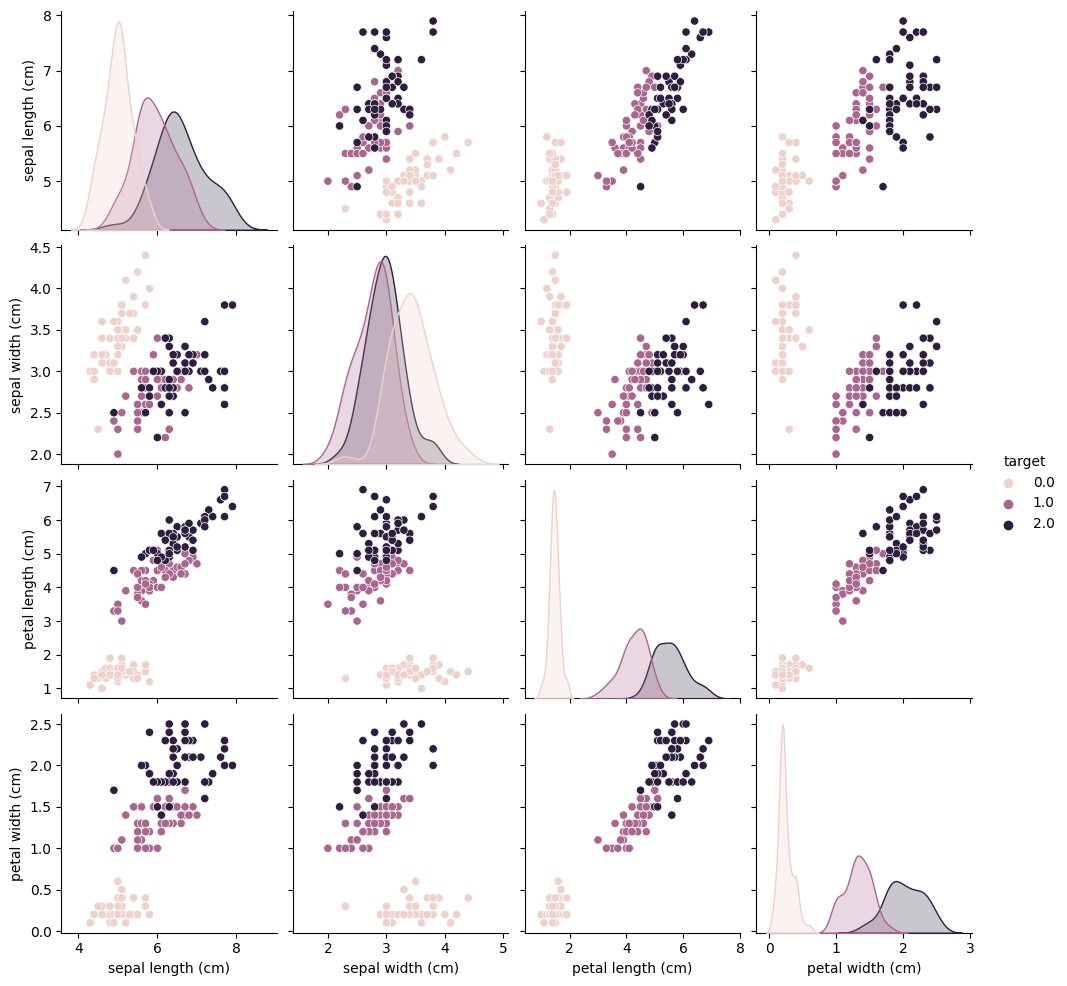

In [16]:
sns.pairplot(df, hue = 'target')

In [45]:
# I use .head(1) sometimes if i forget what column names are
df.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0


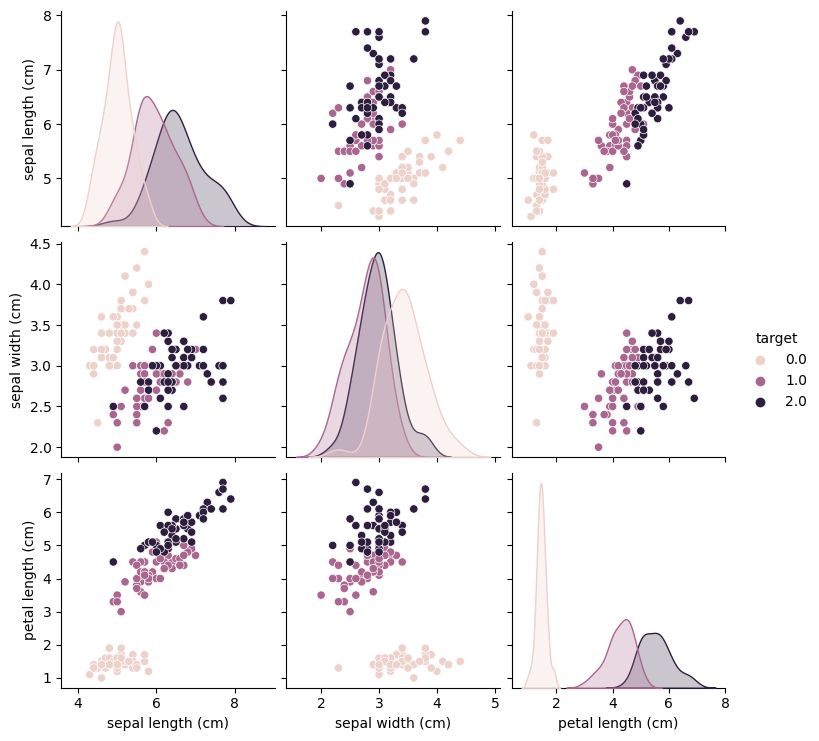

In [30]:
sns.pairplot(df, hue = 'target', vars = ['sepal length (cm)',
                                            'sepal width (cm)',
                                            'petal length (cm)',
                                            'petal width (cm)' ])

<ipython-input-18-3f64c6af1166>:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  c=iris.target, cmap=plt.cm.get_cmap('spring', 3))


Text(0, 0.5, 'petal width (cm)')

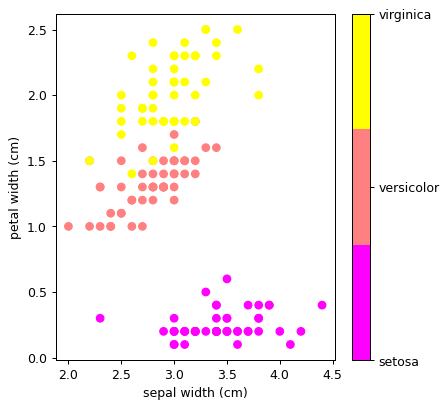

In [18]:
# We wont cover everything happening in depth in the cell
# Read more about matplotlib at https://matplotlib.org/
%matplotlib inline
import matplotlib.pyplot as plt

# choose x & y index values.
# Remember our list looks like this
# ['sepal length (cm)',
#  'sepal width (cm)',
#  'petal length (cm)',
#  'petal width (cm)']

# 0 = sepal length (cm)
# 3 = petal width (cm)
x_index = 1
y_index = 3

# this formatter will label the colorbar with the correct target names
# Look up lambda functions in python, they're neat!
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])


# figsize: changes size of chart (Width, Height)
# dpi: Dots per inch
plt.figure( figsize=(5, 5), dpi=90)

plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target, cmap=plt.cm.get_cmap('spring', 3))

plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

Seaborn is awesome! Read more about its feature [here](https://seaborn.pydata.org/).

# Train a Model - The Machine Learning Part!


Now that we have our data imported and in a state where we think its good for training a model

In [46]:
# Import neighbors model
from sklearn import neighbors

# Assign Data and labels to x & y values
x = iris.data
y = iris.target

# Initialize a ML model (kNN)
# Assign k values to model (adjustable hyperparameter)
knn = neighbors.KNeighborsClassifier(n_neighbors=3)

In [47]:
# Train the model by passing in the data and features
knn.fit(x, y)

KNeighborsClassifier(n_neighbors=3)

You just trained a machine learning model!

In [48]:

# 0 = setosa' 1 = 'versicolor' 2 = 'virginica']
flower_types = ['setosa','versicolor','virginica']

# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?

# Data: sepal length, sepal width, petal length, petal width

# Comment / Uncoomment different flowers below to see the prediction.
# test_flower = [0, 0, 0, 0]
#test_flower = [5.1, 3.5, 1.4, .2]
test_flower = [6, 20, -1, 8]

result = knn.predict([test_flower])

# print index of prediction
print(result)

# Print predicted flower type
print(flower_types[int(result)])

# Print the probability
knn.predict_proba([test_flower])

[0]
setosa


array([[1., 0., 0.]])

In [31]:
# Make the output easier to read.

pred = knn.predict_proba([test_flower])
preddf = pd.DataFrame(pred, columns=iris.target_names)
preddf

,setosa,versicolor,virginica
0,1.0,0.0,0.0


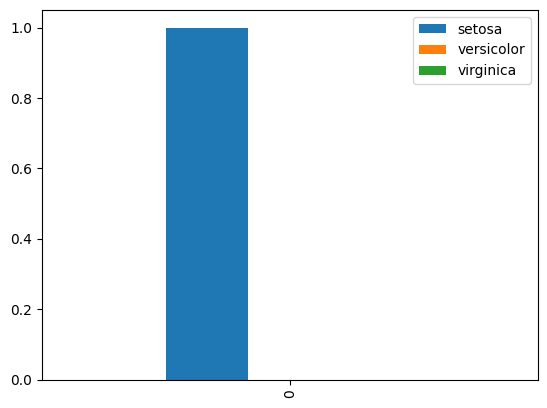

In [32]:
# Lets make it a chart so we can read even more easily!
preddf.plot(kind='bar');

Train right way

#### Training & Testing the Model (The right way)

- Train Set
- Validation Set
- Test Set


In [24]:
# import train test split from sklearn
from sklearn.model_selection import train_test_split

# create the test / training data
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=21,
                                                    stratify=y)


knn = neighbors.KNeighborsClassifier(n_neighbors=1)

# Train model on training data set
knn.fit(x_train, y_train)

# Predict the labels on test data sset
y_pred = knn.predict(x_test)


In [25]:
# Print the list of predictions
print("Test Predictions: \n {}".format(y_pred))
print("True Values: \n {}".format(y_test))

Test Predictions: 
 [1 0 0 1 2 2 0 1 0 2 2 2 0 1 0 0 1 1 0 2 1 0 2 2 2 1 2 1 2 0]
True Values: 
 [1 0 0 1 2 2 0 1 0 2 2 2 0 1 0 0 1 1 0 2 1 0 2 2 1 1 2 1 2 0]


In [26]:
# Print accuracy
knn.score(x_test, y_test)

0.9666666666666667

In [27]:
# confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)

# L
# a
# b
# e
# l
##### Predictced

cm

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]])

<Axes: >

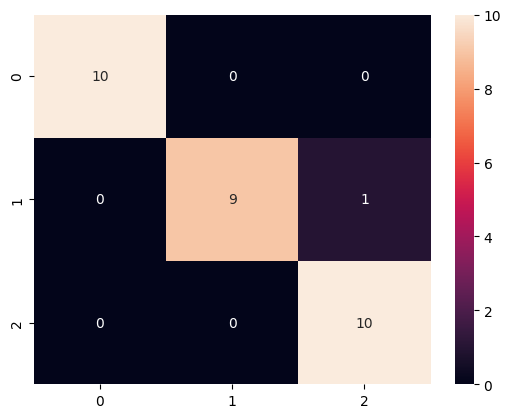

In [28]:
sns.heatmap(cm, annot = True)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



[Precision](https://en.wikipedia.org/wiki/Precision_and_recall)

[Recall](https://en.wikipedia.org/wiki/Precision_and_recall)

[F1 score](https://en.wikipedia.org/wiki/F1_score)



## Data Drift, Quality, and Outliers

Some common questions when starting with ML

I teach workshops around AI obseravbility and ML monitoring almost weekly!

Check out upcoming events at [https://whylabs.ai/](https://whylabs.ai/)


Give our open source project a star! [https://github.com/whylabs/whylogs](https://github.com/whylabs/whylogs)

In [ ]:
!pip install whylogs

## Linear Regression Model

We're going to do similar steps like we did for the kNN model, but we'll be using a different model to predict a linear number instead of a class!

# Keep Learning!
We made it through this quick intro to machine learning!



## Resources





## Stay connected







